In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('./ECommerce_consumer behaviour.csv')

## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px;">Supermarket dataset for predictive marketing 2023 </span>
## <b>1 <span style='color:#246a13'> Business Understanding</span></b>

Hunter's e-grocery is a renowned up-and-coming new generation lifestyle brand. We have our brand presence in 10 counties and are always looking for new ways to improve and anticipate our customer needs. black swan events like Covid-19, Ukraine war, Gas shortage has definitely impacted the way our customers shop in our store. Please use the dataset to propose business value for informative based decision making.

In [3]:
dataset.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN          17                  1          0   
1                     NaN          91                  2          0   
2                     NaN          36                  3          0   
3                     NaN          83                  4          0   
4                     NaN          83                  5          0   

   department_id  department        product_name  
0             13      pantry  baking ingredients  
1             16  dairy eggs     soy lactosefree  
2             16  dairy eggs              butter  
3              4     produce    fresh vegetables  
4              4     produce    fresh vegetables

## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:110%;text-align:center;border-radius:10px;">Data Understanding </span>

Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns
 * order_id – (A unique number to identity the order)
 * user_id - (A unique number to identify the user)
 * order_number – (Number of the order)
 * order_dow – (Day of the Week the order was made)
 * order_hour_of_day – (Time of the order)
 * days_since_prior_order - (History of the order)
 * product_id – (Id of the product)
 * add_to_cart_order – (Number of items added to cart)
 * reordered – (If the reorder took place)
 * department_id - (Unique number allocated to each department)
 * department – (Names of the departments)
 * product_name – (Name of the products)

## <b>2.1<span style='color:#246a13'> Get information on the data</span></b>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
dataset.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [6]:
print(124342/2_019_501)

0.06157065532525114


In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [9]:
dataset.describe()

order_id       user_id  order_number     order_dow  \
count  2.019501e+06  2.019501e+06  2.019501e+06  2.019501e+06   
mean   1.707013e+06  1.030673e+05  1.715138e+01  2.735367e+00   
std    9.859832e+05  5.949117e+04  1.752576e+01  2.093882e+00   
min    1.000000e+01  2.000000e+00  1.000000e+00  0.000000e+00   
25%    8.526490e+05  5.158400e+04  5.000000e+00  1.000000e+00   
50%    1.705004e+06  1.026900e+05  1.100000e+01  3.000000e+00   
75%    2.559031e+06  1.546000e+05  2.400000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       2.019501e+06            1.895159e+06  2.019501e+06   
mean        1.343948e+01            1.138603e+01  7.120590e+01   
std         4.241008e+00            8.970980e+00  3.820727e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  3.100000e+01   
50%         1.300000e+01            8.000000e+00  8.300000e+01   
75%         1.600000e+01            1.500000e+01  1.070000e+02   
max         2.300000e+01            3.000000e+01  1.340000e+02   

       add_to_cart_order     reordered  department_id  
count       2.019501e+06  2.019501e+06   2.019501e+06  
mean        8.363173e+00  5.897427e-01   9.928349e+00  
std         7.150059e+00  4.918804e-01   6.282933e+00  
min         1.000000e+00  0.000000e+00   1.000000e+00  
25%         3.000000e+00  0.000000e+00   4.000000e+00  
50%         6.000000e+00  1.000000e+00   9.000000e+00  
75%         1.100000e+01  1.000000e+00   1.600000e+01  
max         1.370000e+02  1.000000e+00   2.100000e+01

## <b>2.2 <span style='color:#246a13'> Taking care of Null values</span></b>

#### <b><span style='color:#FF0000'> NOTE :</span></b>
Considering that the data pertains to an online store, it is reasonable to postulate that the null values hold significance and do not imply missing data. Given that the data was not gathered manually, it is my opinion that the null values pertain to initial users who have not placed an order previously.

In [10]:
dataset['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [11]:
dataset['days_since_prior_order'] = dataset['days_since_prior_order'].fillna(-1)

In [12]:
dataset['days_since_prior_order']= dataset['days_since_prior_order'].astype(np.int64)

<p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA PREPARATION</p>

## <b>3.1 <span style='color:#246c12'> Investigating all elements within each feature</span></b>

In [13]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    nr_values = len(unique_values)
    if nr_values < 23:
        print("The number of unique values for feature {} : {} --- {}".format(column, nr_values, unique_values))
    else:
        print("The number of unique values for feature {} : {}".format(column, nr_values))

The number of unique values for feature order_id : 200000
The number of unique values for feature user_id : 105273
The number of unique values for feature order_number : 100
The number of unique values for feature order_dow : 7 --- [2 3 0 1 6 5 4]
The number of unique values for feature order_hour_of_day : 24
The number of unique values for feature days_since_prior_order : 32
The number of unique values for feature product_id : 134
The number of unique values for feature add_to_cart_order : 137
The number of unique values for feature reordered : 2 --- [0 1]
The number of unique values for feature department_id : 21 --- [13 16  4 15 12  1  3  7 14 19  6 17 11 18 20  9 21  5  8 10  2]
The number of unique values for feature department : 21 --- ['pantry' 'dairy eggs' 'produce' 'canned goods' 'meat seafood' 'frozen'
 'bakery' 'beverages' 'breakfast' 'snacks' 'international' 'household'
 'personal care' 'babies' 'deli' 'dry goods pasta' 'missing' 'alcohol'
 'pets' 'bulk' 'other']
The number

## <b>3.2 <span style='color:#246c12'> Aggregating & grouping values to visualize purchasing behaviour</span></b>

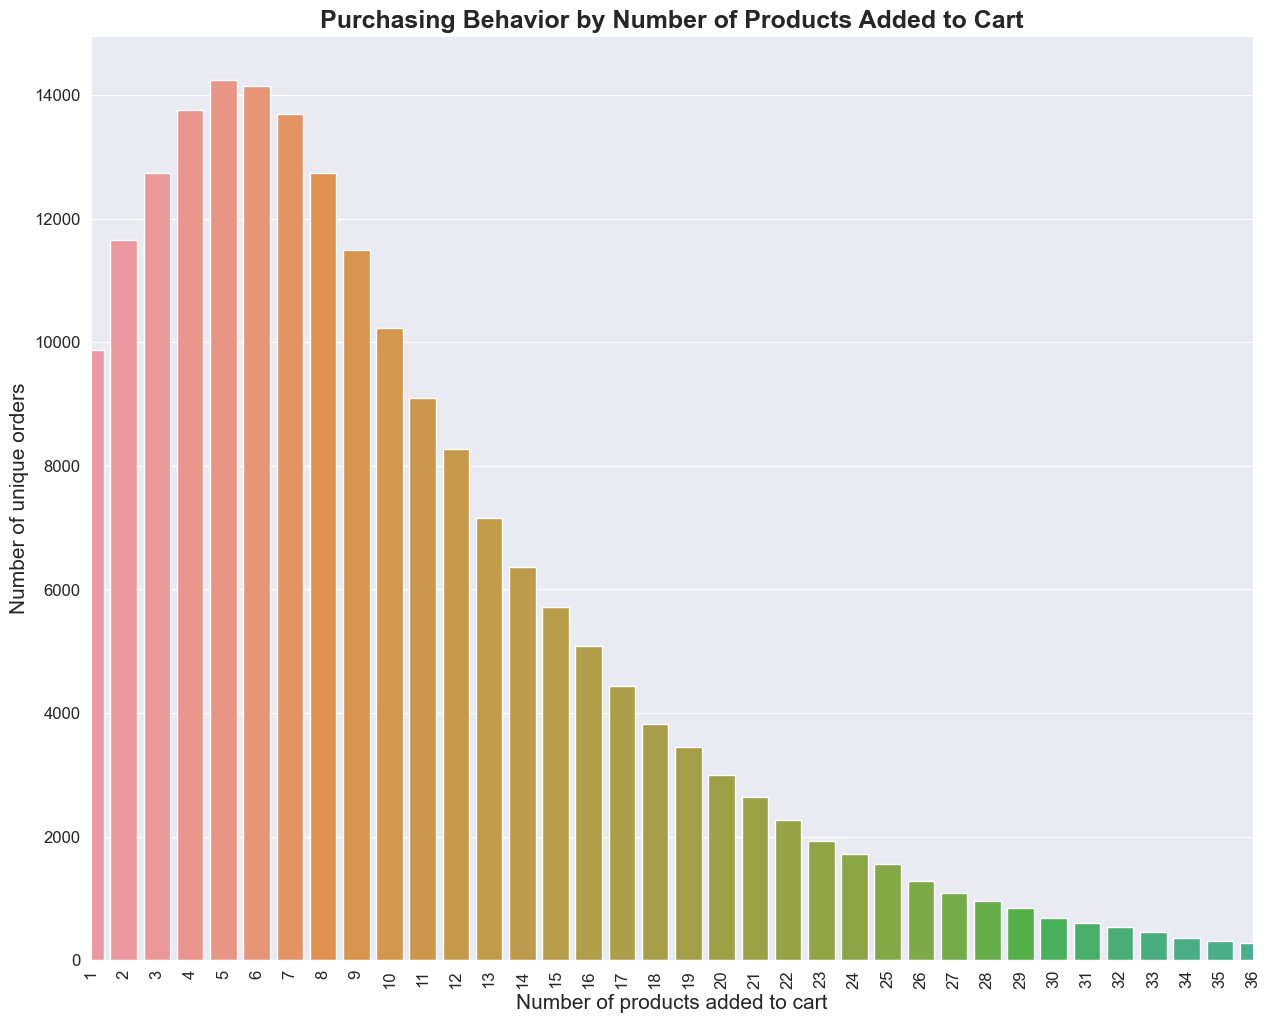

In [14]:
grouped = dataset.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
sns.set_palette("rocket_r")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
ax.grid(True, axis='y')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of unique orders', fontsize=15)
plt.xlabel('Number of products added to cart', fontsize=15)
plt.title('Purchasing Behavior by Number of Products Added to Cart', fontsize=18, fontweight='bold')
plt.xlim(0, 35)
plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.**

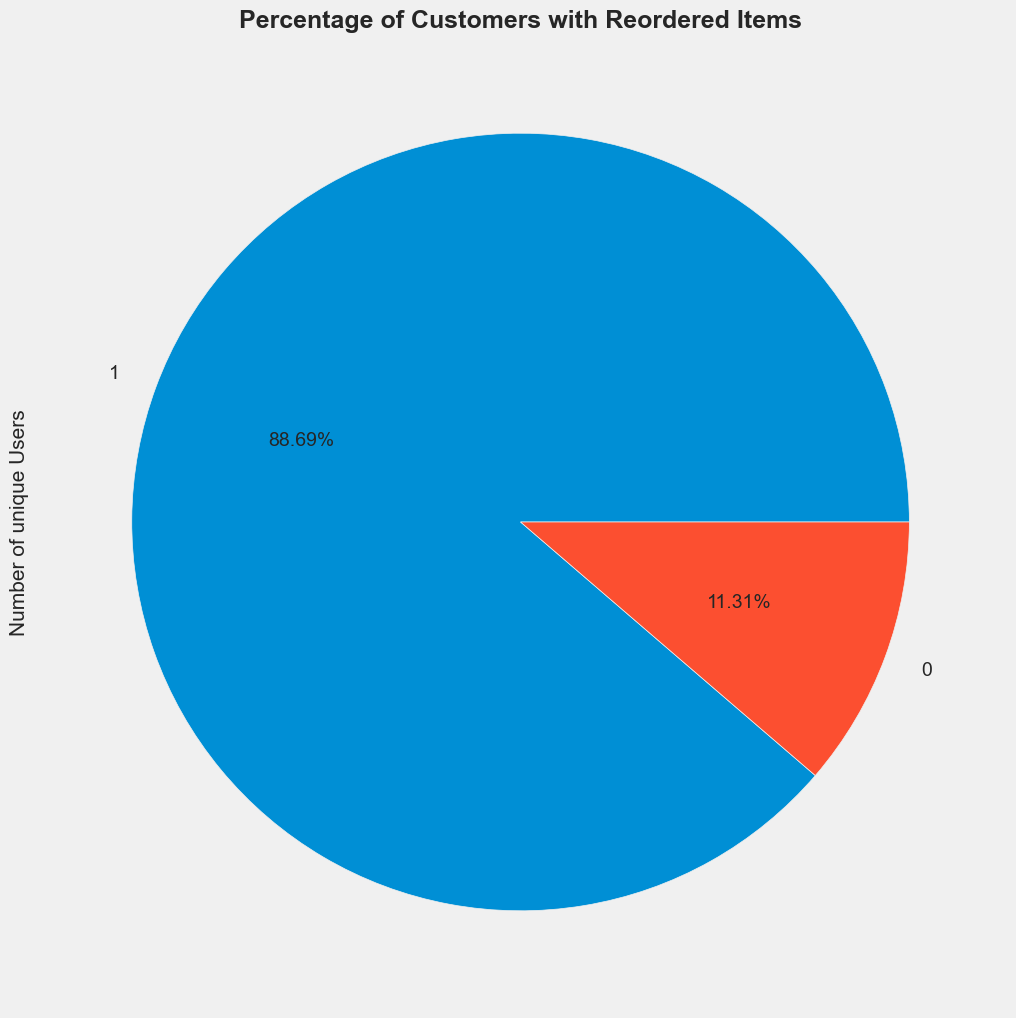

In [15]:
with plt.style.context('fivethirtyeight'):
    grouped = dataset.groupby("user_id")["reordered"].aggregate("max").reset_index()
    grouped = grouped.reordered.value_counts()

    _, ax = plt.subplots(figsize=(15, 12))
    plt.pie(grouped.values, labels=grouped.index, autopct = '%1.2f%%')
    ax.grid(True, axis='y')
    plt.xticks(rotation='vertical', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Number of unique Users', fontsize=15)
    plt.title('Percentage of Customers with Reordered Items', fontsize=18, fontweight='bold')
    plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above plot, we can see that 88% of customers have placed at least one order with a reordered item. This suggests that a significant portion of customers have purchased items that they have bought before.**

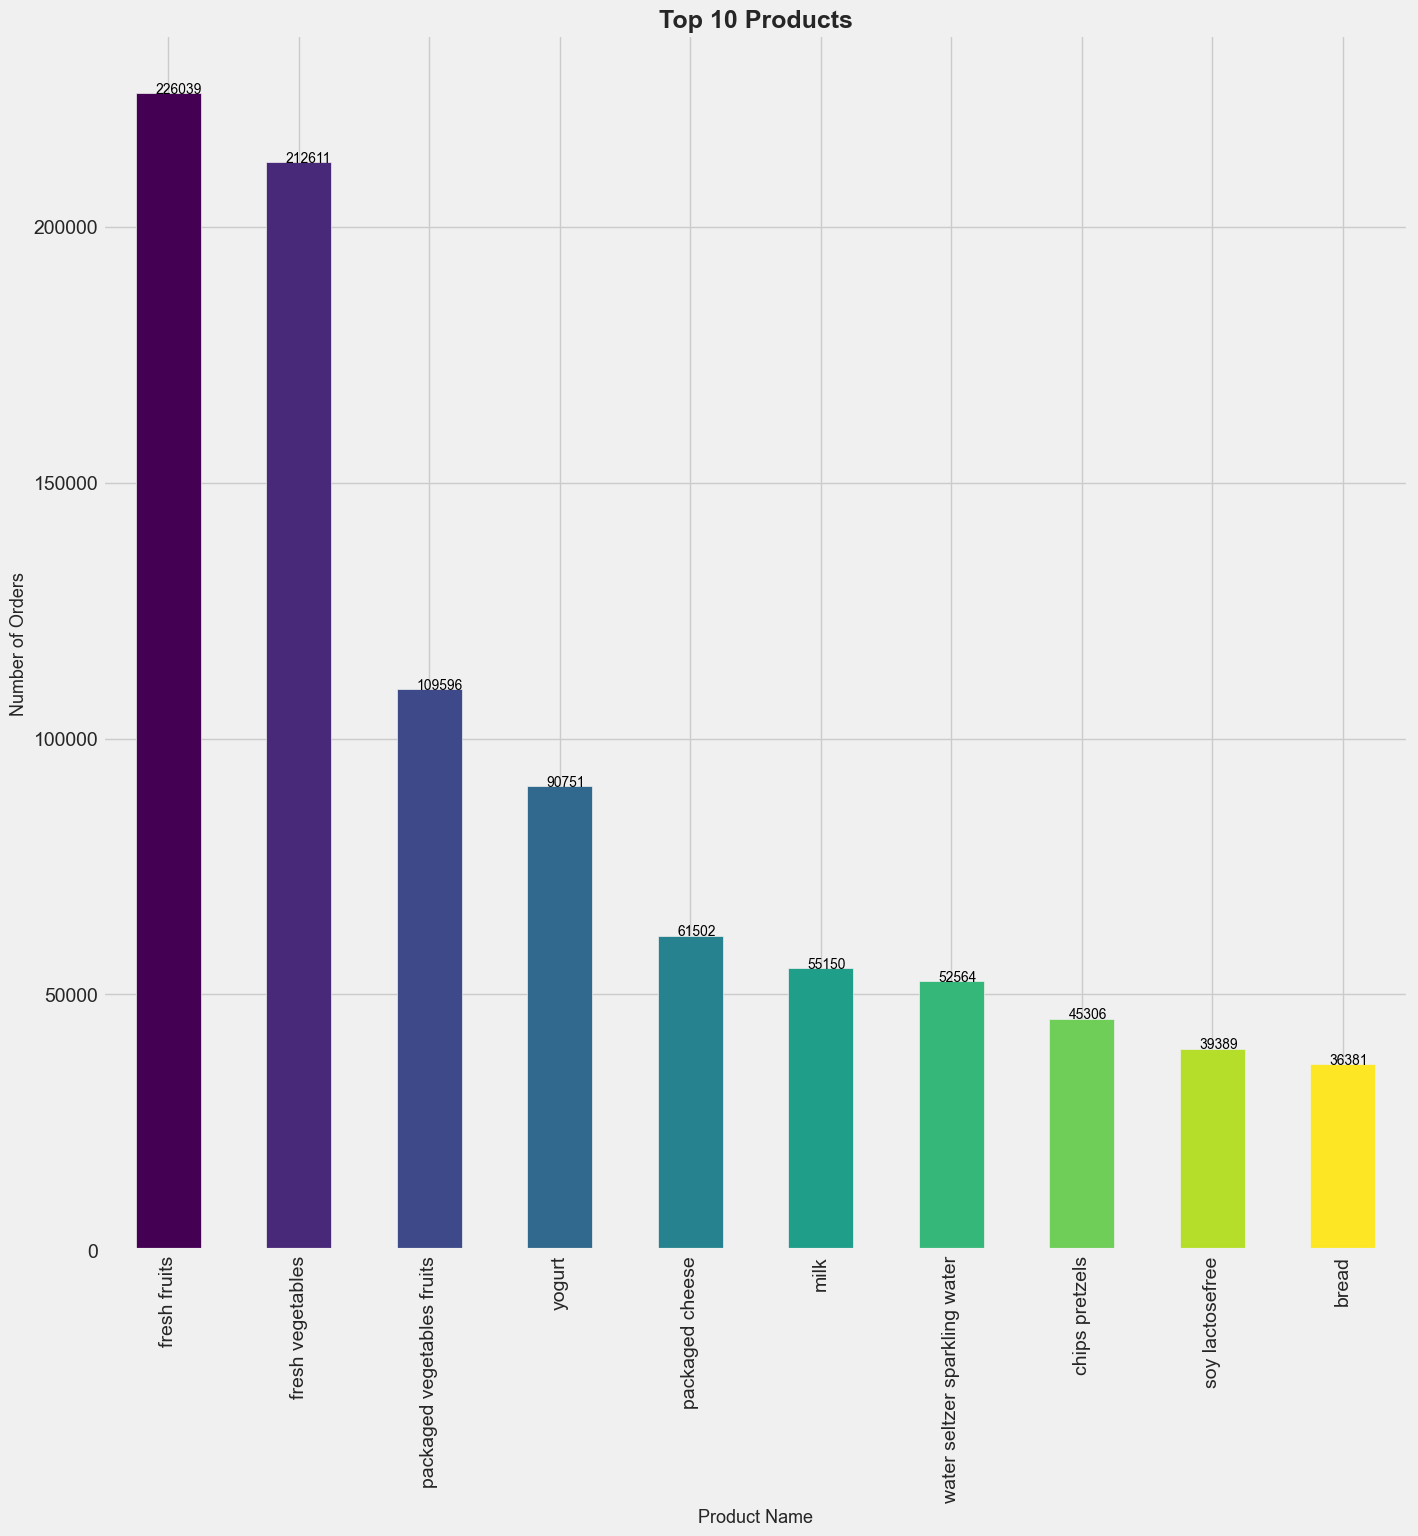

In [16]:
with plt.style.context('fivethirtyeight'):
    top_products = dataset.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, 10)]
    ax = top_products.plot(kind='bar', title='Top 10 Products', color=colors, figsize=(15, 15))
    plt.xlabel('Product Name',fontsize=13)
    plt.ylabel('Number of Orders',fontsize=13)
    for i in ax.patches:
        ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
    plt.title('Top 10 Products', fontsize=18, fontweight='bold')
    plt.show()

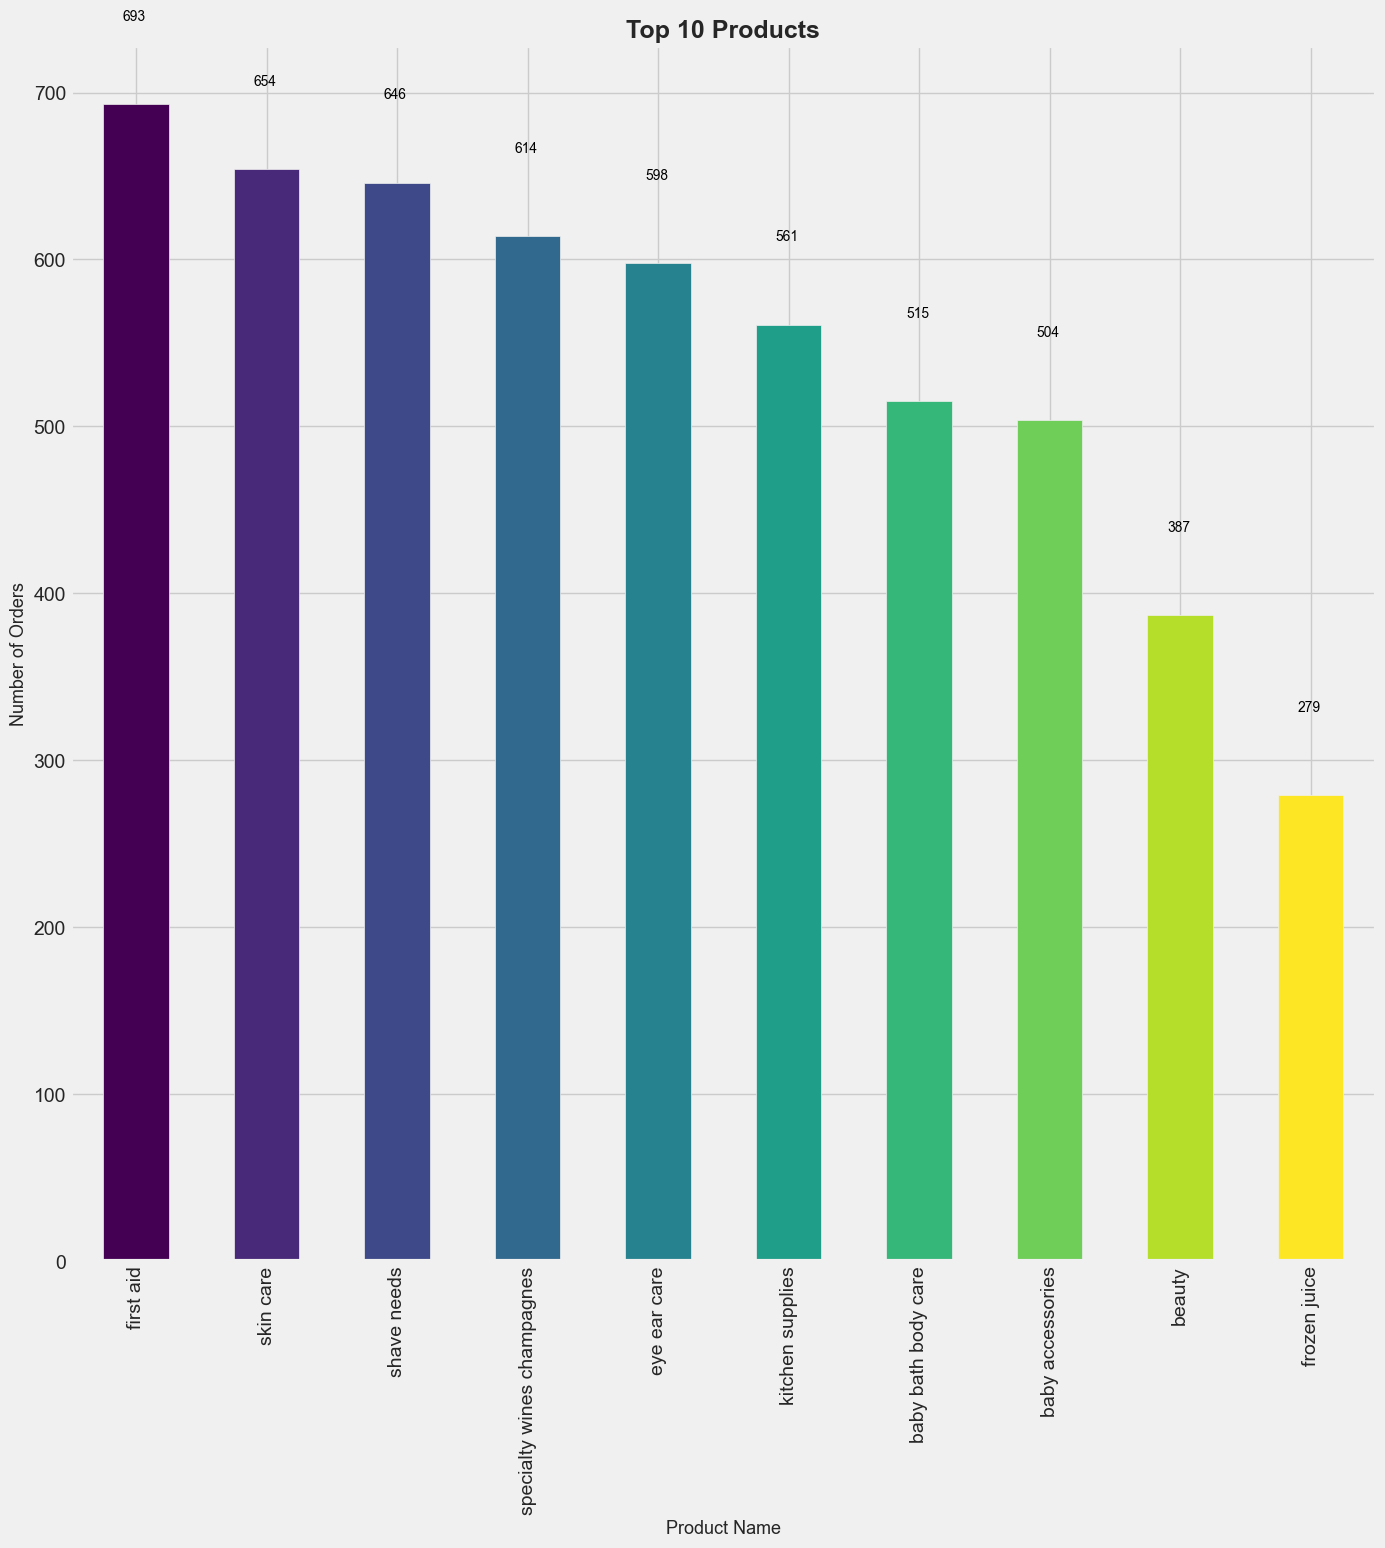

In [17]:
with plt.style.context('fivethirtyeight'):
    top_products = dataset.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(10)
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, 10)]
    ax = top_products.plot(kind='bar', title='Bottom 10 Products', color=colors, figsize=(15, 15))
    plt.xlabel('Product Name',fontsize=13)
    plt.ylabel('Number of Orders',fontsize=13)
    for i in ax.patches:
        ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
    plt.title('Top 10 Products', fontsize=18, fontweight='bold')
    plt.show()

## <b>3.3 <span style='color:#246c12'> Creating time-based features</span></b>

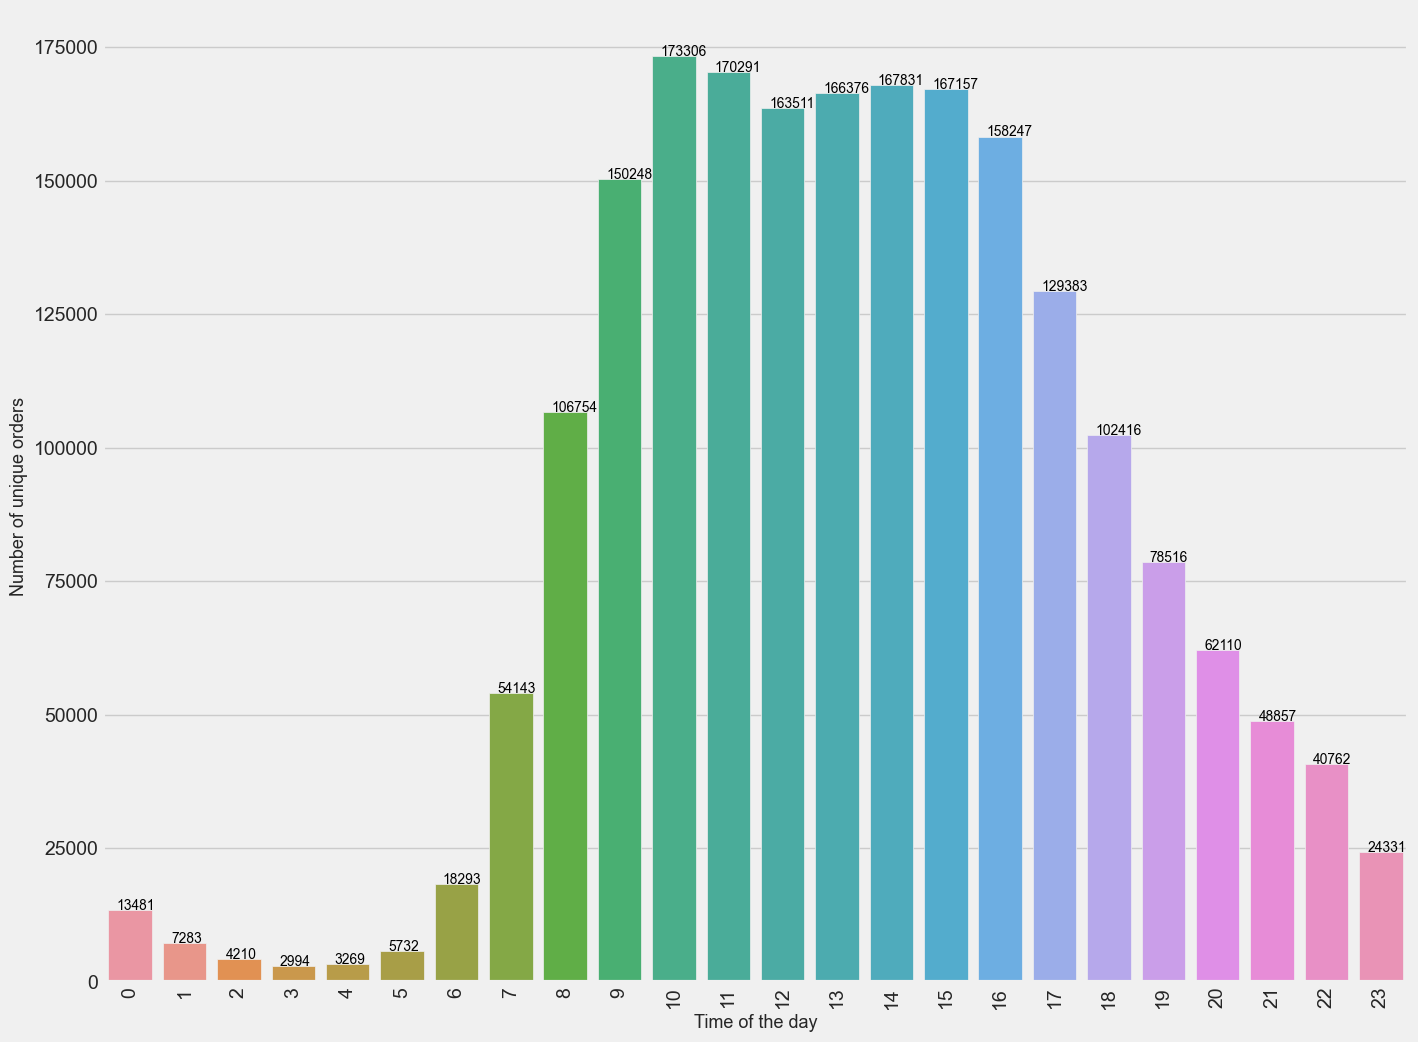

In [18]:
with plt.style.context('fivethirtyeight'):
    # TIME OF THE DAY WHEN THE ORDER WAS MADE
    grouped = dataset.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)


    _, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='vertical')
    sns.barplot(x = grouped.index, y = grouped.user_id)
    sns.color_palette("rocket_r", 10)

    plt.ylabel('Number of unique orders', fontsize=13)
    plt.xlabel('Time of the day', fontsize=13)

    for i in ax.patches:
        ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
    plt.show()

    plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above plot it can be understood a that the majority of customers ordered between 10 AM - 4 PM**

In [19]:
with plt.style.context('fivethirtyeight'):

    day_hour_df = dataset.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
    day_hour_df_piv = day_hour_df.pivot('order_dow', 'order_hour_of_day', 'order_number')/dataset.shape[0]

    plt.figure(figsize=(15,10))
    sns.heatmap(day_hour_df_piv, cmap='viridis')
    plt.yticks([0,1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.xlabel("Hour of day")
    plt.yticks(rotation=0)
    plt.ylabel("Day of week")


    plt.title("Cross-table of days and hours of orders", fontsize=18, fontweight='bold')

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**Further exploration reveals some intriguing trends:**

- **The highest traffic occurs on Monday between 10 AM and 4 PM, at the start of the week.**

- **Traffic is lower from Wednesday to Friday, beginning at 4 PM.**

In [ ]:
dataset['order_time_period'] = dataset['order_hour_of_day'].apply(lambda x: f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}')

In [ ]:
with plt.style.context('fivethirtyeight'):

    color_palette = plt.get_cmap('viridis')

    orders_by_day_time = dataset.pivot_table(
        index='order_dow',
        columns='order_time_period',
        values='user_id',
        aggfunc='count'
    )

    ax = orders_by_day_time.plot(kind='bar', figsize=(15, 15), color=color_palette(np.linspace(0, 1, len(orders_by_day_time.columns))))
    ax.set_title('The time when the order was made by day and time of day', fontsize=18, fontweight='bold')
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) # fixed the x-axis labels
    ax.set_ylabel('Number of orders')
    ax.legend(title='Orders Made')
    plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The plot provides a global overview of trends:**

- **Most customers tend to place orders between morning and early afternoon.**
- **Evening and night see fewer orders from customers.**

## <b>3.4 <span style='color:#246c12'> Creating average cart size feature</span></b>
**This feature represents the average number of items ordered by each user.**

In [ ]:
dataset['avg_cart_size'] = dataset.groupby('user_id')['add_to_cart_order'].transform('mean')

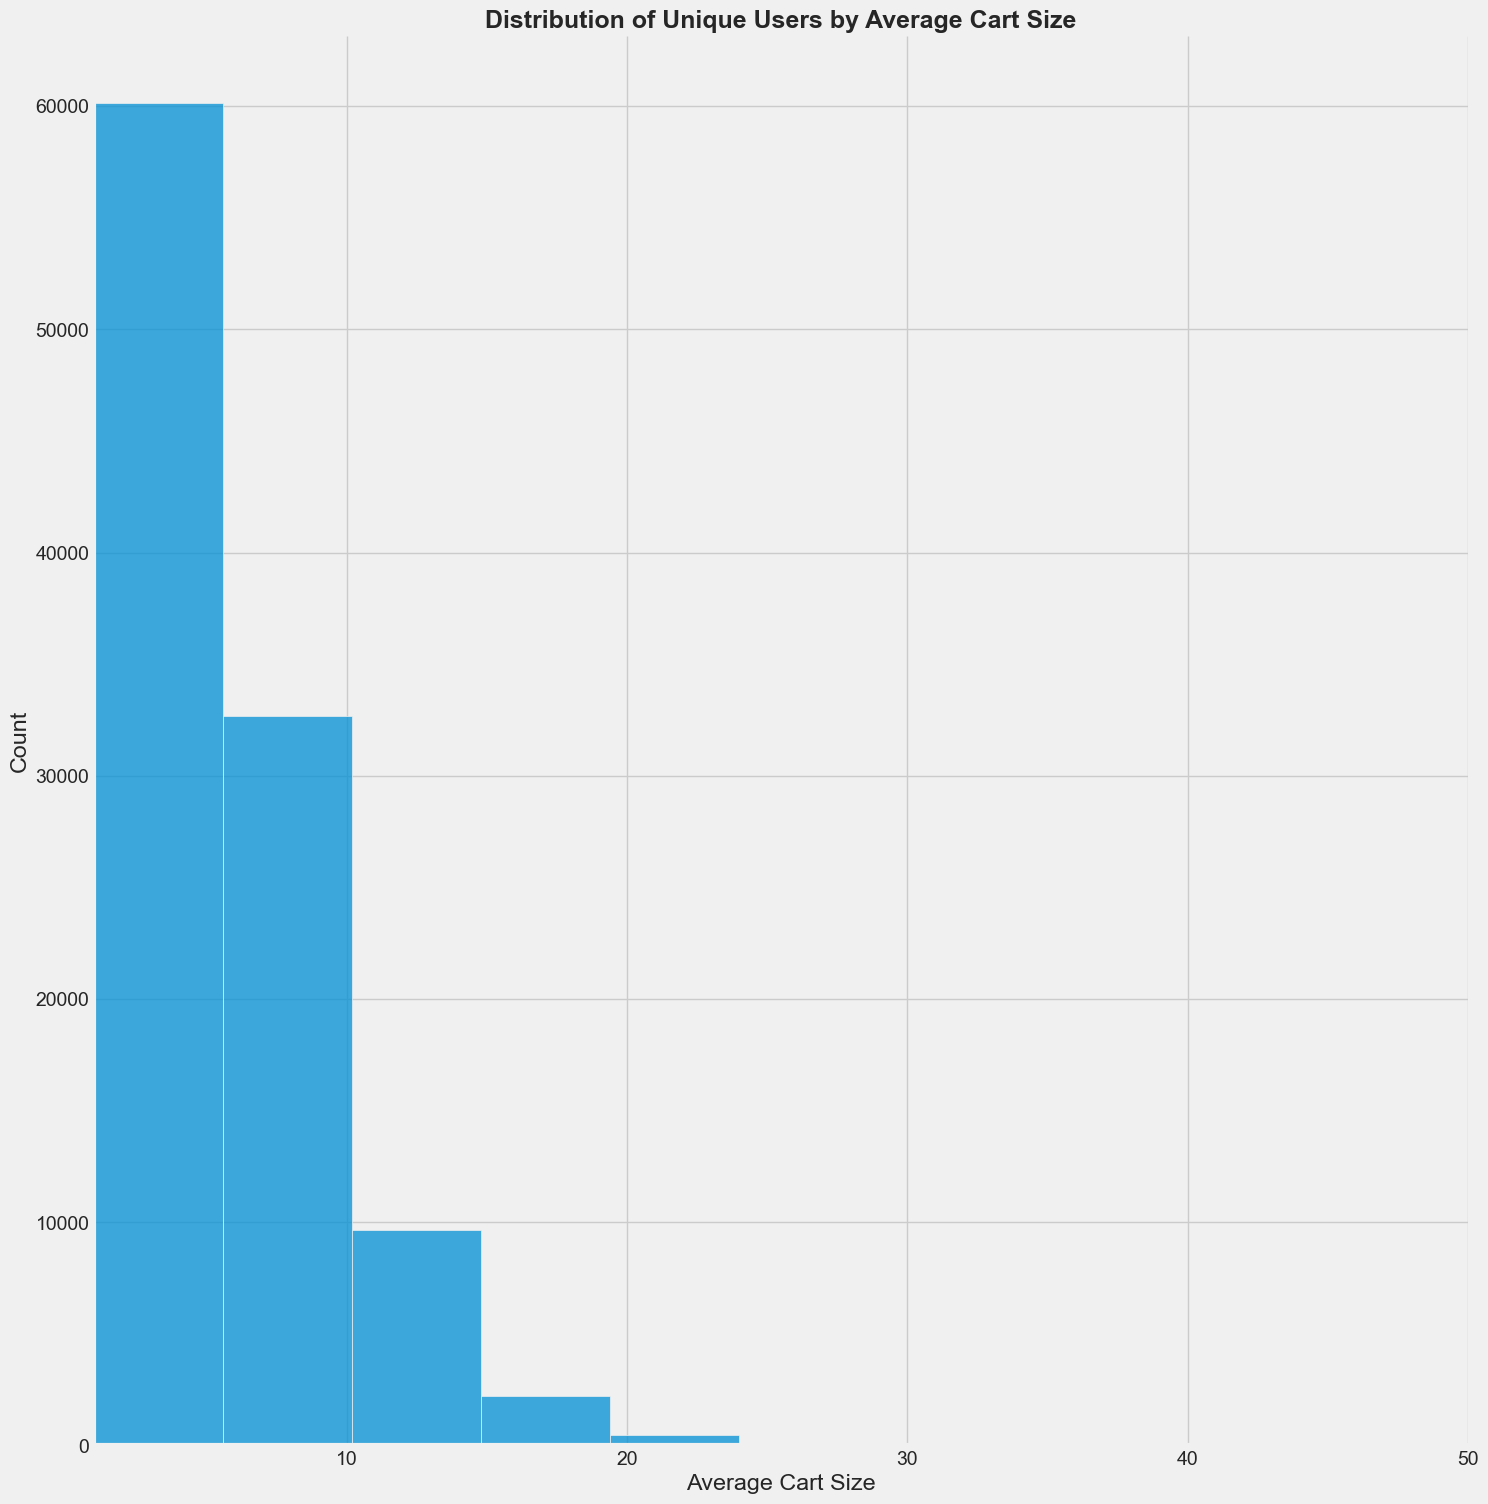

In [ ]:
with plt.style.context('fivethirtyeight'):
    avg_cart_size_df = dataset.groupby('avg_cart_size').agg({'user_id': 'nunique'}).reset_index()
    avg_cart_size_df.columns = ['avg_cart_size', 'unique_users']
    sns.displot(data=avg_cart_size_df, x='avg_cart_size', weights='unique_users',   height=15, aspect=1)
    plt.title('Distribution of Unique Users by Average Cart Size', fontsize=18, fontweight='bold')
    plt.xlabel('Average Cart Size')
    plt.ylabel('Count')
    plt.xlim(1, 50)
    plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**We can categorize our customers based on their average cart size:**
- **Customers with an average cart size of 1 to 5 items are considered low-volume shoppers.**
- **Customers with an average cart size of 5 to 20 items are considered medium-volume shoppers.**
- **Customers with an average cart size of more than 20 items are considered high-volume shoppers.**

In [ ]:
dataset['customer_category'] = dataset['avg_cart_size'].apply(lambda x: "low-volume" if x <= 5 else "medium-volume" if x <= 20 else "high-volume")

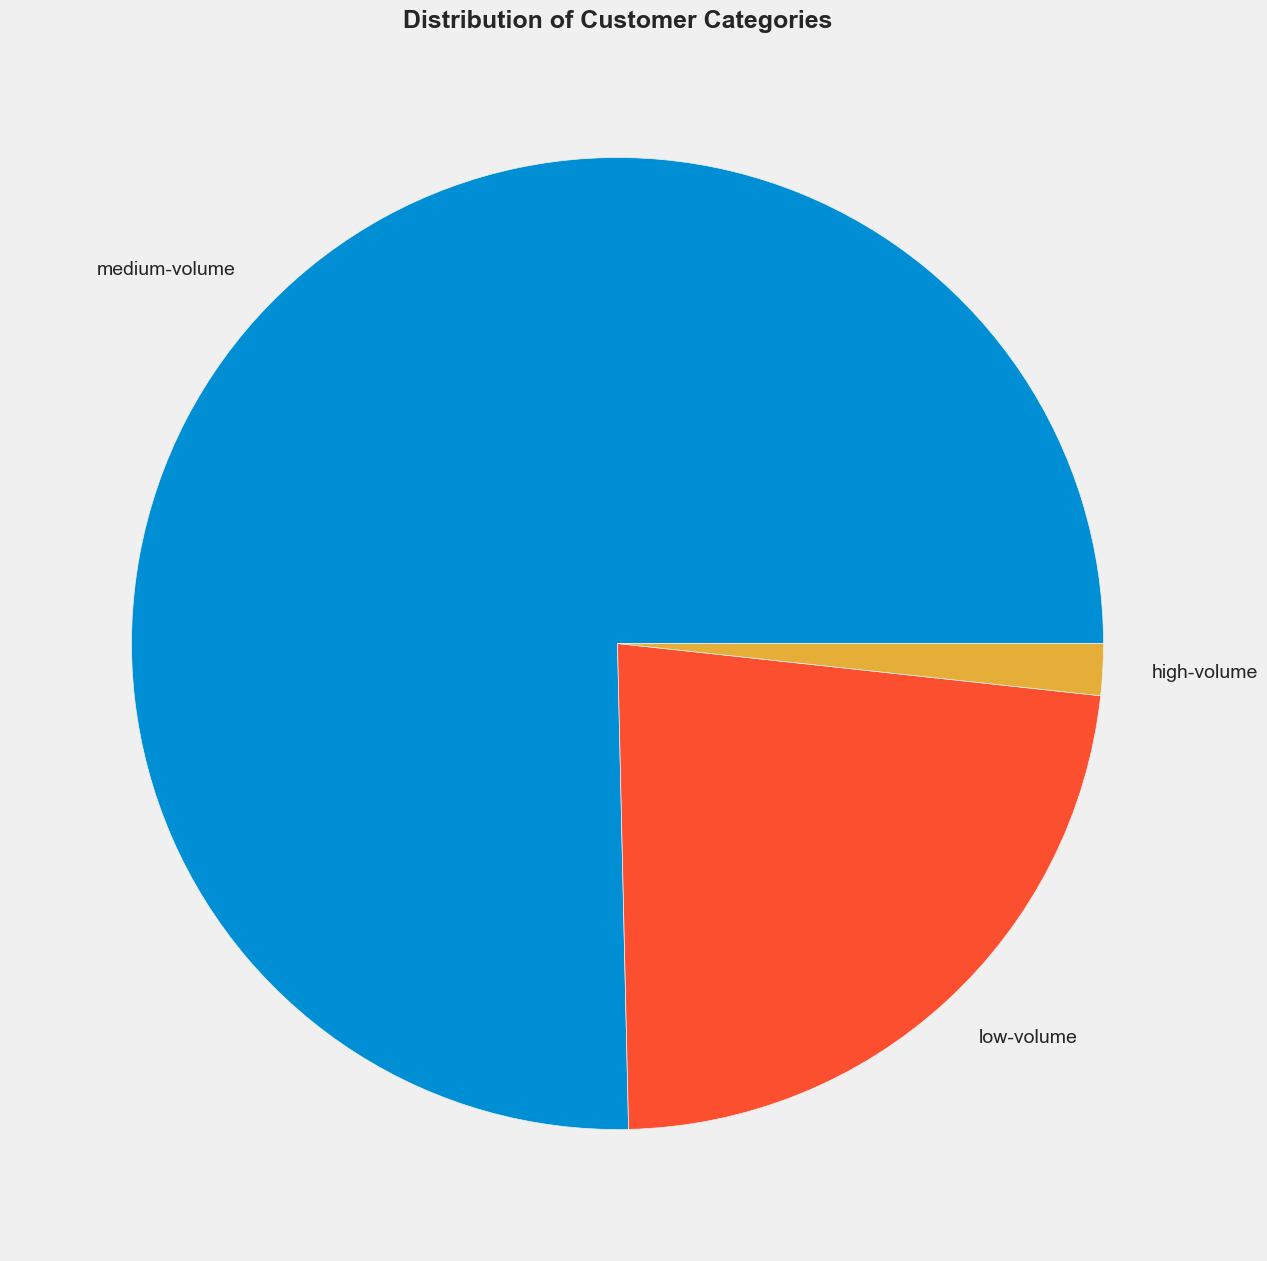

In [ ]:
with plt.style.context('fivethirtyeight'):
    customer_category_counts = dataset['customer_category'].value_counts(normalize=True)

    plt.figure(figsize=(15, 15))
    plt.pie(customer_category_counts, labels=customer_category_counts.index)
    plt.title('Distribution of Customer Categories',fontsize=18, fontweight='bold')
    plt.show()

***most customers have small and medium cart sizes***

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The customer category alone may not be a reliable feature, as it does not account for the total number of orders placed by each customer. For example, a customer who has placed a single high-volume order would be categorized as a high-volume shopper, while a customer who has placed multiple small-volume orders may still be considered a low-volume shopper.**

## <b>3.5 <span style='color:#246c12'> Creating order count feature</span></b>

In [ ]:
dataset['order_count'] = dataset.groupby('user_id')['order_id'].transform('count')

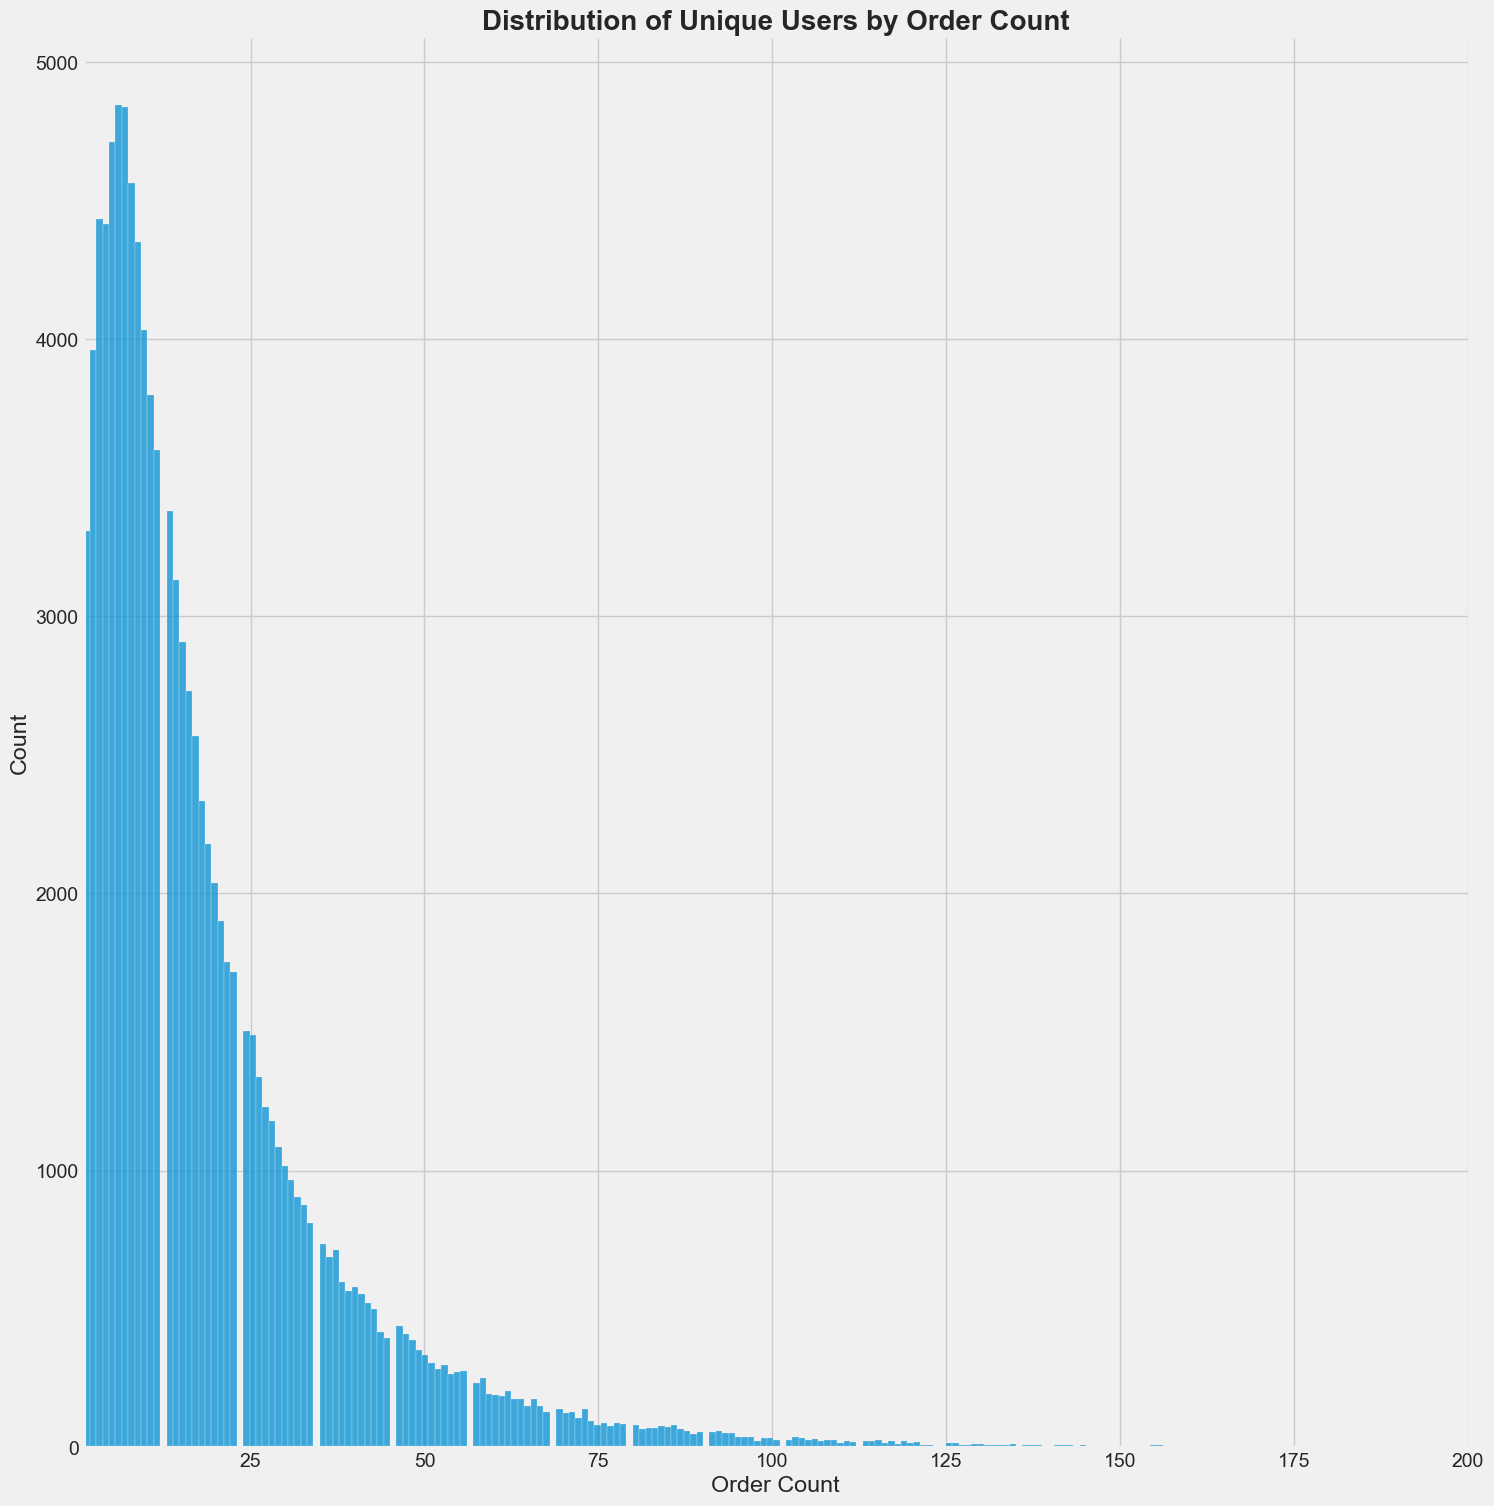

       order_count  unique_users
count   215.000000    215.000000
mean    114.330233    489.641860
std      76.794773   1090.745555
min       1.000000      1.000000
25%      54.500000      4.000000
50%     108.000000     26.000000
75%     161.500000    273.000000
max     460.000000   4845.000000


In [ ]:
with plt.style.context('fivethirtyeight'):
    order_count_df = dataset.groupby('order_count').agg({'user_id': 'nunique'}).reset_index()
    order_count_df.columns = ['order_count', 'unique_users']
    sns.displot(data=order_count_df, x='order_count', weights='unique_users', bins=500, height=15, aspect=1)
    plt.title('Distribution of Unique Users by Order Count', fontsize=20, fontweight='bold')
    plt.xlabel('Order Count')
    plt.ylabel('Count')
    plt.xlim(1, 200)
    plt.show()
    print(order_count_df.describe())

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**Customers can be segmented into five categories based on their order count:**
- **First-time customers have an order count of 1 to 10.**
- **Interested customers have an order count of 10 to 25.**
- **Regular customers have an order count of 25 to 50.**
- **Loyal customers have an order count of 50 to 150.**
- **VIP customers have an order count of more than 150.**

In [ ]:
dataset['order_count_category'] = dataset['order_count'].apply(lambda x: "First-time" if 1 <= x <= 10 else "Interested" if 10 <= x <= 25 else "Regular" if 25 <= x <= 50 else "Loyal" if 50 <= x <= 150 else "VIP")

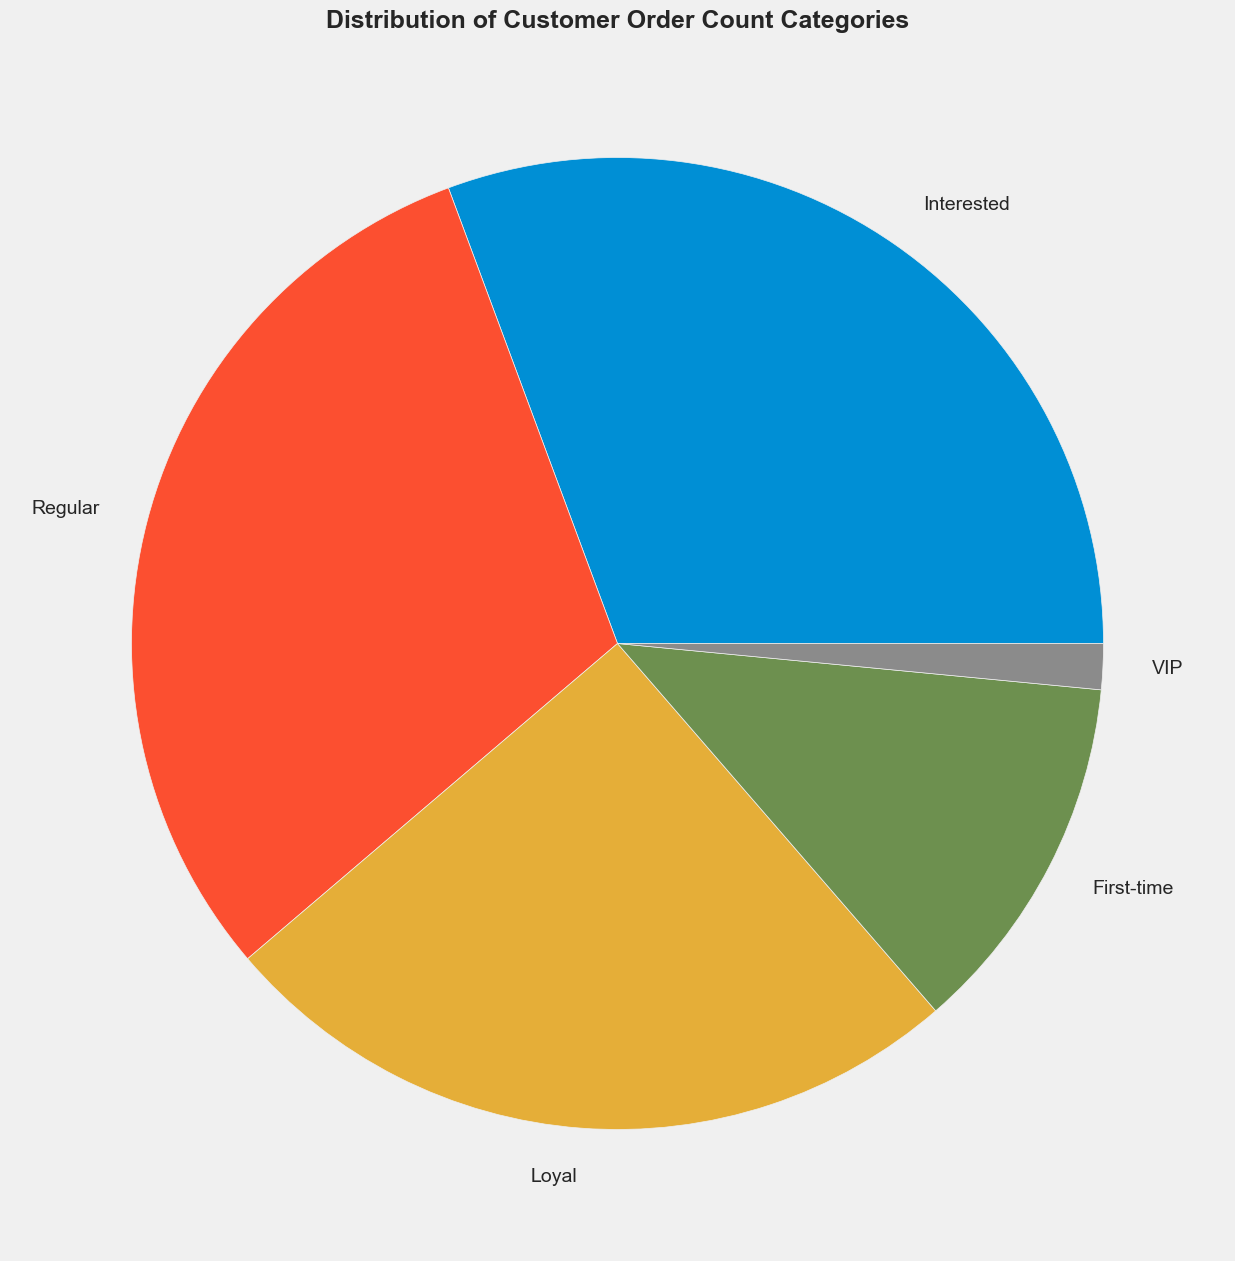

In [ ]:
with plt.style.context('fivethirtyeight'):
    customer_category_counts = dataset['order_count_category'].value_counts(normalize=True)

    plt.figure(figsize=(15, 15))
    plt.pie(customer_category_counts, labels=customer_category_counts.index)
    plt.title('Distribution of Customer Order Count Categories',fontsize=18, fontweight='bold')
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
    unique_customers_df = dataset.groupby(['order_count_category', 'customer_category']).agg({'user_id': 'nunique'}).reset_index()
    unique_customers_df.columns = ['order_count_category', 'customer_category', 'unique_customers']

    g = sns.catplot(data=unique_customers_df, x='order_count_category', y='unique_customers', hue='customer_category', kind='bar', height=15, aspect=1.5)
    g.set_axis_labels('Order Count Category', 'Unique Customers')
    g.ax.set_yscale('log') # set the y-axis scale to logarithmic
    plt.title('Distribution of Unique Customers by Order Count Category and Customer Category', fontsize=18, fontweight='bold')
    plt.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The y-axis has been adjusted to better visualize the distribution of customers in the third category.**

**Upon further analysis, it appears that my initial concern regarding the reliability of customer categorization based on order volume may have been misplaced. In fact, there seems to be a correlation between customers with prior experience with the store and a tendency to place high volume orders.**

## <b>3.6 <span style='color:#246c12'> Aggregating & grouping values to understand purchasing behaviour</span></b>

In [ ]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = dataset.groupby(["product_id","product_name","department","order_time_period"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
del grouped["index"]
grouped

product_id                   product_name  department order_time_period  \
0           24                   fresh fruits     produce         afternoon   
1           83               fresh vegetables     produce         afternoon   
2           24                   fresh fruits     produce           morning   
3           83               fresh vegetables     produce           morning   
4          123     packaged vegetables fruits     produce         afternoon   
5          120                         yogurt  dairy eggs         afternoon   
6           24                   fresh fruits     produce           evening   
7          123     packaged vegetables fruits     produce           morning   
8           83               fresh vegetables     produce           evening   
9          120                         yogurt  dairy eggs           morning   
10          21                packaged cheese  dairy eggs         afternoon   
11          84                           milk  dairy eggs         afternoon   
12         115  water seltzer sparkling water   beverages         afternoon   
13         107                 chips pretzels      snacks         afternoon   
14          21                packaged cheese  dairy eggs           morning   

    reordered  
0      104177  
1      102115  
2       77479  
3       68634  
4       51493  
5       41484  
6       37544  
7       36210  
8       35026  
9       31412  
10      29360  
11      24712  
12      24641  
13      21838  
14      20462

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the
customers are most interested to purchase**

## <b>3.7 <span style='color:#246c12'> Creating average days since prior order feature</span></b>

In [ ]:
dataset['avg_days_since_prior_order'] = dataset.groupby('user_id')['days_since_prior_order'].transform('mean')

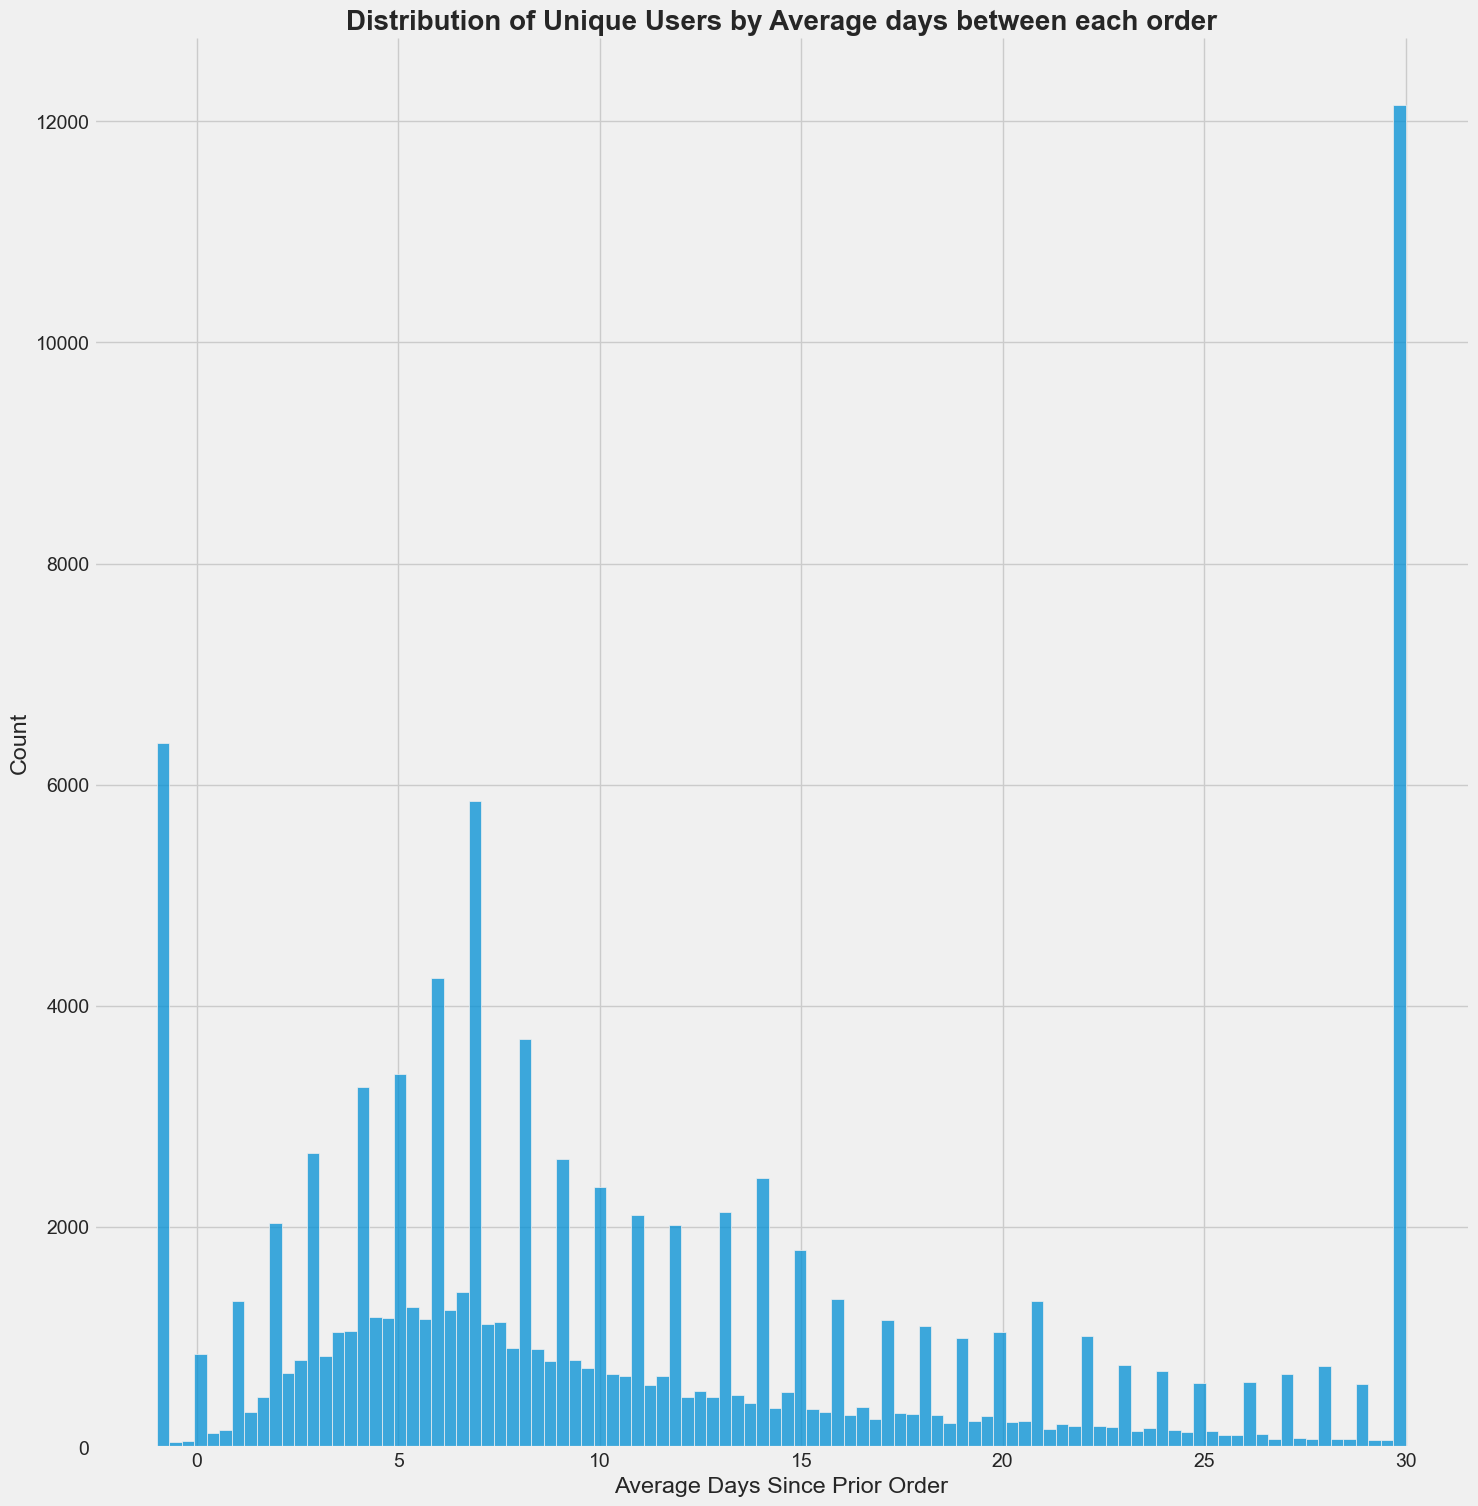

In [ ]:
with plt.style.context('fivethirtyeight'):
    order_df = dataset.groupby('avg_days_since_prior_order').agg({'user_id': 'nunique'}).reset_index()
    order_df.columns = ['avg_days_since_prior_order', 'unique_users']
    sns.displot(data=order_df, x='avg_days_since_prior_order', weights='unique_users', bins=100, height=15, aspect=1)
    plt.title('Distribution of Unique Users by Average days between each order', fontsize=20, fontweight='bold')
    plt.xlabel('Average Days Since Prior Order')
    plt.ylabel('Count')
    plt.show()

In [ ]:
dataset["dow_mode"] = dataset.groupby('user_id')['order_dow'].transform(lambda x: x.value_counts().index[0])

In [ ]:
working_set = dataset.copy()
# working_set.drop(columns=['department_id', 'product_id', 'order_count', 'avg_cart_size', 'order_id', 'user_id', 'order_number', 'order_hour_of_day', 'add_to_cart_order', 'days_since_prior_order', 'order_dow'], inplace=True)
working_set.drop(columns=['department_id', 'product_id', 'order_id', 'user_id', 'add_to_cart_order', 'days_since_prior_order', 'order_dow'], inplace=True)

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

cat_cols = working_set.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    working_set[col] = le.fit_transform(working_set[col])


ss = StandardScaler()

working_set = ss.fit_transform(working_set)

ModuleNotFoundError: No module named 'yellowbrick'

## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px;">Modeling</span>

## <b>4.1.1 <span style='color:#246a13'> Finding Optimal Number of Clusters using KNN Clustering</span></b>


In [ ]:
plt.figure(figsize=(15, 15))
k_elbow = KElbowVisualizer(KMeans(random_state=69), k=(2,10))
k_elbow.fit(working_set)
k_elbow.show()

NameError: name 'KElbowVisualizer' is not defined

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import random
subsample_indices = random.sample(range(len(working_set)), min(10000, len(working_set)))
data_subsample = working_set[subsample_indices]

KeyError: "None of [Index([ 617025,  455234,  677095,  182328,  880799, 1065102, 1741545,  496110,\n       1970891,  282415,\n       ...\n       1813058,  169229,  101434, 1362020,  371999,  348123,  383623, 1974466,\n        994687,  465867],\n      dtype='int32', length=10000)] are in the [columns]"

In [ ]:
plt.figure(figsize=(15, 15))
sil_vis = SilhouetteVisualizer(KMeans(random_state=69), k=(2,10))
sil_vis.fit(data_subsample)
sil_vis.show()

In [ ]:
inertia_scores = []
silhouette_scores = []
k_values = range(2, 12) 

from sklearn.metrics import silhouette_score
for k in k_values:

    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2048)
    kmeans.fit(working_set)
    
    # Evaluate inertia (Sum of squared distances of samples to their closest cluster center)
    inertia_scores.append(kmeans.inertia_)

    # Evaluate silhouette score on the subsample
    subsample_labels = kmeans.predict(data_subsample)
    subsample_silhouette_score = silhouette_score(data_subsample, subsample_labels)
    silhouette_scores.append(subsample_silhouette_score)

In [ ]:
with plt.style.context('fivethirtyeight'):

    plt.plot(k_values, inertia_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method', fontsize=18, fontweight='bold')
    plt.show()

In [ ]:
with plt.style.context('fivethirtyeight'):

    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score', fontsize=18, fontweight='bold')
    plt.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The optimal number of clusters is typically determined by identifying the “elbow” point in the inertia plot or by selecting the highest silhouette score in the silhouette plot.**

**From the plot, we can determine the optimal number of clusters for the given dataset. We can observe that the elbow point is at K=5, suggesting that five clusters might be the optimal choice.**

## <b>4.2.2 <span style='color:#246a13'>Model Fitting with Optimal Parameters</span></b>


In [ ]:
kmeans_model = KMeans(n_clusters=5, n_init='auto', random_state=69)
prediction = kmeans_model.fit_predict(working_set)

## <b>4.2.3.1 <span style='color:#246a13'>Plottig the resaults using PCA</span></b>


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
w_pca = pca.fit_transform(working_set)

df_pca = pd.DataFrame(data=w_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_model.labels_

In [ ]:
plt.figure(figsize=(15, 15))
for cluster in range(5):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
w_pca = pca.fit_transform(working_set)

df_pca2 = pd.DataFrame(data=w_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca2['Cluster'] = kmeans_model.labels_

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    cluster_data = df_pca2[df_pca2['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster + 1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters')
ax.legend()
plt.show()

## <b>4.2.3.2 <span style='color:#246a13'>Plottig the resaults using t-SNE</span></b>

In [ ]:
from sklearn.manifold import TSNE
from sklearn.utils import resample

data_sample = resample(working_set, n_samples=50000, random_state=69)

tsne = TSNE(n_components=3, perplexity=20, random_state=42, verbose=True)
data_tsne = tsne.fit_transform(data_sample)

df_tsne = pd.DataFrame(data=data_tsne, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
df_tsne['Cluster'] = kmeans_model.predict(data_sample)


In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(4):
    cluster_data = df_tsne[df_tsne['Cluster'] == cluster]
    ax.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], cluster_data['Dimension 3'],
               label=f'Cluster {cluster + 1}')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Clusters')
ax.legend()
sns.set(style='whitegrid')
ax.view_init(elev=15, azim=135)
plt.show()


In [ ]:
sns.scatterplot(data=df_tsne, x='Dimension 1', y='Dimension 2', hue='Cluster', palette='Set1')
plt.title('Clusters - Scatter Plot')
plt.show()

In [ ]:
numeric_cols = ['Dimension 1', 'Dimension 2', 'Dimension 3']
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    for cluster in range(5):
        cluster_data = df_tsne[df_tsne['Cluster'] == cluster]
        sns.histplot(data=cluster_data, x=col, kde=True, label=f'Cluster {cluster + 1}')
    plt.title(f'{col} Distribution by Cluster')
    plt.legend()
    plt.show()

In [ ]:
sns.pairplot(data=df_tsne, vars=numeric_cols, hue='Cluster', palette='Set1')
plt.title('Pairplot of Numeric Features by Cluster')
plt.show()

## <b>4.2.1 <span style='color:#246a13'>Hierarchical Clustering</span></b>
**In Hierarchical Clustering, I selected four as the number of clusters due to memory constraints that prevented the calculation of the optimum value.**

In [ ]:
data_subsample = resample(working_set, n_samples=10000, random_state=42)


from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(data_subsample)

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

kmeans_silhouette = silhouette_score(data_subsample, kmeans_model.predict(data_subsample))
agg_silhouette = silhouette_score(data_subsample, agg_labels)

kmeans_calinski_harabasz = calinski_harabasz_score(data_subsample, kmeans_model.predict(data_subsample))
hierarchical_calinski_harabasz = calinski_harabasz_score(data_subsample, agg_labels)

kmeans_davies_bouldin = davies_bouldin_score(data_subsample, kmeans_model.predict(data_subsample))
hierarchical_davies_bouldin = davies_bouldin_score(data_subsample, agg_labels)

print(f'k-means silhoutte score:{kmeans_silhouette}')
print(f'Hierarchical Clustering silhoutte score:{agg_silhouette}')

print(f'k-means calinski harabasz score:{kmeans_calinski_harabasz}')
print(f'Hierarchical Clustering calinski harabasz score:{hierarchical_calinski_harabasz}')

print(f'k-means Davies-Bouldin score:{kmeans_davies_bouldin}')
print(f'Hierarchical Clustering Davies-Bouldin score:{hierarchical_davies_bouldin}')

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**Based on the given data, it can be concluded that K-means and hierarchical clustering show promising results for this dataset. In terms of silhouette scores, hierarchical clustering has a score of 0.1299892761795882, indicating moderate levels of separation and cohesion, while K-means has a slightly lower score of 0.11933239476797168. In terms of Calinski-Harabasz score, K-means has a higher score of 1097.5315399886479 compared to hierarchical clustering’s score of 982.1847252294237, suggesting that K-means produces better-defined and separated clusters. In terms of Davies-Bouldin score, hierarchical clustering has a lower score of 1.981944446907363 compared to K-means’ score of 2.189249011138527, indicating that hierarchical clustering produces more distinct and well-separated clusters.**

**Overall, both K-means and hierarchical clustering show promising results for this dataset. However, hierarchical clustering appears to have a slight edge over K-means in terms of silhouette scores and Davies-Bouldin score while K-means has a higher Calinski-Harabasz score.**

## <b>4.3.1 <span style='color:#246a13'> PCA for Feature Selection</span></b>


In [ ]:
num_components = [2, 4, 6, 8, 10]
explained_variances = []


working_set = dataset.copy()
cat_cols = working_set.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cat_cols:
    le = LabelEncoder()
    working_set[col] = le.fit_transform(working_set[col])
    
se = StandardScaler()

working_set = se.fit_transform(working_set)
    
for n in num_components:
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(working_set)
    explained_variances.append(sum(pca.explained_variance_ratio_))

    silhouette_scores = []
    inertia_scores = []
    
    for k in k_values:

        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2048)
        kmeans.fit(data_pca)

        # Evaluate inertia (Sum of squared distances of samples to their closest cluster center)
        inertia_scores.append(kmeans.inertia_)

        # Evaluate silhouette score on the subsample
        data_sample = resample(data_pca, n_samples=50000, random_state=69)        

        silhouette_scores.append(silhouette_score(data_sample, kmeans.predict(data_sample)))
    
    with plt.style.context('fivethirtyeight'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

        ax1.plot(k_values, silhouette_scores, marker='o')
        ax1.set_xlabel('Number of Clusters (K)')
        ax1.set_ylabel('Silhouette Score')
        ax1.set_title(f'Silhouette Score with {n} clusters', fontsize=18, fontweight='bold')

        ax2.plot(k_values, inertia_scores, marker='o')
        ax2.set_xlabel('Number of Clusters (K)')
        ax2.set_ylabel('Inertia')
        ax2.set_title(f'Elbow Method with {n} clusters', fontsize=18, fontweight='bold')

        plt.show()

    
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(15, 15))

    plt.plot(num_components, explained_variances)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.show()

In [ ]:
num_components = [2, 4, 6, 8, 10]
explained_variances = []


working_set = dataset.copy()
cat_cols = working_set.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cat_cols:
    le = LabelEncoder()
    working_set[col] = le.fit_transform(working_set[col])
    
    
for n in num_components:
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(working_set)
    explained_variances.append(sum(pca.explained_variance_ratio_))

    silhouette_scores = []
    inertia_scores = []
    
    for k in k_values:

        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2048)
        kmeans.fit(data_pca)

        # Evaluate inertia (Sum of squared distances of samples to their closest cluster center)
        inertia_scores.append(kmeans.inertia_)

        # Evaluate silhouette score on the subsample
        data_sample = resample(data_pca, n_samples=50000, random_state=69)        

        silhouette_scores.append(silhouette_score(data_sample, kmeans.predict(data_sample)))
    
    with plt.style.context('fivethirtyeight'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

        ax1.plot(k_values, silhouette_scores, marker='o')
        ax1.set_xlabel('Number of Clusters (K)')
        ax1.set_ylabel('Silhouette Score')
        ax1.set_title(f'Silhouette Score with {n} clusters', fontsize=18, fontweight='bold')

        ax2.plot(k_values, inertia_scores, marker='o')
        ax2.set_xlabel('Number of Clusters (K)')
        ax2.set_ylabel('Inertia')
        ax2.set_title(f'Elbow Method with {n} clusters', fontsize=18, fontweight='bold')

        plt.show()
    
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(15, 15))

    plt.plot(num_components, explained_variances)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.show()

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(15, 15))

    plt.plot(num_components, explained_variances)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.show()

In [ ]:
with plt.style.context('fivethirtyeight'):

    plt.figure(figsize=(15, 15))
    plt.plot(num_components, silhouette_scores)
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score by Number of Components')
    plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**Based on the analysis of the code and its results, it can be concluded that applying PCA (Principal Component Analysis) to reduce the dimensionality of a dataset to different numbers of components (2, 4, 6, 8, and 10) and calculating the explained variance ratio and the silhouette score for a K-means clustering model with 4 clusters produces interesting results. In terms of explained variance ratio, it increases as the number of components increases. However, all values are very close to 1, indicating that even with just 2 components, almost all of the variance in the data is captured. In terms of silhouette scores for different numbers of components, they are very similar and do not show a clear trend. This suggests that the number of components does not have a significant impact on the quality of the clustering.**

**Overall, both 2 components and more show promising results for this dataset. However, using just 2 components is sufficient to capture almost all of the variance in the data while also achieving a good silhouette score for the K-means clustering model.**

## <b>4.3.4 <span style='color:#246a13'>Visualaizing after PCA</span></b>


In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(working_set)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)
dataset_ = dataset.copy()

dataset_['cluster'] = kmeans.labels_

df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

plt.figure(figsize=(15, 15))
for cluster in range(4):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}', alpha = 0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.legend()
plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The clustering results show clear separation between the clusters. Since two principal components were selected, it is not possible to visualize the clusters in a 3-dimensional space.**

## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px;">Insights to the Store Owners</span>

In [ ]:
# Define a custom aggregation function to calculate the mode
def mode(x):
    return x.value_counts().index[0]

# Calculate summary statistics for each feature within each cluster
summary_stats = dataset_.groupby('cluster').agg(['mean', 'median', mode])

In [ ]:
cat_cols = dataset_.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cat_cols:
    le = LabelEncoder()
    dataset_[col] = le.fit_transform(dataset_[col])

In [ ]:
cluster_1 = dataset_[dataset_['cluster'] == 0]
cluster_1.hist(figsize=(15,15))

In [ ]:
cluster_2 = dataset_[dataset_['cluster'] == 1]
cluster_2.hist(figsize=(15,15))

In [ ]:
cluster_3 = dataset_[dataset_['cluster'] == 2]
cluster_3.hist(figsize=(15,15))

In [ ]:
cluster_4 = dataset_[dataset_['cluster'] == 3]
cluster_4.hist(figsize=(15,15))

In [ ]:
cluster_1.describe()

In [ ]:
cluster_2.describe()

In [ ]:
cluster_3.describe()

In [ ]:
cluster_4.describe()

In [ ]:
kmeans.inertia_